## iris ==> 4features ==>binary classification : 100

In [76]:
import pandas as pd
import numpy as np

In [77]:
irisDF = pd.read_csv('iris.csv')
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [78]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
irisDF.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
targetSR = irisDF['variety']
targetSR.shape


(150,)

In [81]:
featureDF = irisDF[irisDF.columns[:-1]]

In [82]:
featureDF.shape

(150, 4)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF,targetSR,stratify=targetSR,random_state=101)

In [84]:
# 스케일링

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaled = StandardScaler()
scaled.fit(X_train)

StandardScaler()

In [87]:
iris_X_train = scaled.transform(X_train)
iris_X_test = scaled.transform(X_test)

In [88]:
iris_X_train

array([[ 1.57490972, -0.16528031,  1.23312993,  1.15523567],
       [-1.31466823, -0.16528031, -1.35213415, -1.18542274],
       [ 1.07237443, -0.16528031,  0.83097774,  1.41530883],
       [ 0.82110678, -0.16528031,  0.83097774,  1.0251991 ],
       [-0.43523146, -1.76503047,  0.14157399,  0.11494305],
       [ 0.9467406 , -0.16528031,  0.37137524,  0.24497963],
       [-0.93776676,  0.97739838, -1.35213415, -1.18542274],
       [ 1.07237443,  0.5203269 ,  1.1182293 ,  1.15523567],
       [-0.18396381,  1.66300559, -1.17978321, -1.18542274],
       [ 1.32364208,  0.29179116,  1.1182293 ,  1.41530883],
       [-0.43523146,  0.97739838, -1.40958446, -1.31545932],
       [ 1.4492759 ,  0.29179116,  0.54372617,  0.24497963],
       [ 0.44420531,  0.74886264,  0.94587836,  1.41530883],
       [ 0.19293766, -0.39381605,  0.42882555,  0.3750162 ],
       [-1.06340058, -1.76503047, -0.2605782 , -0.27516669],
       [ 2.57998032,  1.66300559,  1.52038149,  1.0251991 ],
       [ 2.32871267, -0.

In [89]:
# 모델

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

In [91]:
data = irisDF
X,y = targetSR,featureDF
C_list = [0.001,0.01,0.1,1,10,100,1000]
score_list =[]
for i in C_list:
      clf=svm.SVC(kernel='linear',C=i,random_state=101,probability=True)
      clf.fit(X_train,y_train)
      calibrated_svc = CalibratedClassifierCV(estimator=clf, method='sigmoid', cv='prefit')
      calibrated_svc.fit(iris_X_train, y_train)
      #probabilities = calibrated_svc.predict_proba(iris_X_train)
      #probabilities_list.extend(list(probabilities))
      print("각 클래스에 속할 확률:")
      #print(probabilities)
      print(f'C={i} \n [train_Score]: {clf.score(X_train,y_train)}\n [test_Score]: {clf.score(X_test,y_test)}')
      score_list.append(clf.score(X_test,y_test))
      
      
print(max(score_list))


각 클래스에 속할 확률:
C=0.001 
 [train_Score]: 0.6071428571428571
 [test_Score]: 0.5789473684210527
각 클래스에 속할 확률:
C=0.01 
 [train_Score]: 0.9375
 [test_Score]: 0.8947368421052632
각 클래스에 속할 확률:
C=0.1 
 [train_Score]: 0.9642857142857143
 [test_Score]: 0.9473684210526315
각 클래스에 속할 확률:
C=1 
 [train_Score]: 1.0
 [test_Score]: 0.9473684210526315
각 클래스에 속할 확률:
C=10 
 [train_Score]: 0.9910714285714286
 [test_Score]: 0.9210526315789473
각 클래스에 속할 확률:
C=100 
 [train_Score]: 1.0
 [test_Score]: 0.9210526315789473
각 클래스에 속할 확률:
C=1000 
 [train_Score]: 1.0
 [test_Score]: 0.9210526315789473
0.9473684210526315


C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: U

In [92]:
support_vactors = clf.support_vectors_
support_vactors

array([[4.5, 2.3, 1.3, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [6. , 2.2, 5. , 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7]])

In [93]:
y_pred = clf.predict(X_test)

In [94]:
train_Score = clf.score(X_train,y_train)
test_Score = clf.score(X_test,y_test)

In [95]:
print(f'[train_Score] : {train_Score}'
      f'\n[test_Score] : {test_Score}')

[train_Score] : 1.0
[test_Score] : 0.9210526315789473


In [96]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9210526315789473


## pipeline(StandardScaler + SVC)

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [98]:
pipeline = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='linear'))])

In [99]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [100]:
accuracy= pipeline.score(X_test,y_test)

In [101]:
train_Score = pipeline.score(X_train,y_train)

In [102]:
test_Score = pipeline.score(X_test,y_test)

In [103]:
print(f'[pipeline train_Score]: {train_Score}\n[pipeline test_Score]: {test_Score}\n[pipeline accuracy]: {accuracy}')

[pipeline train_Score]: 0.9821428571428571
[pipeline test_Score]: 0.9473684210526315
[pipeline accuracy]: 0.9473684210526315


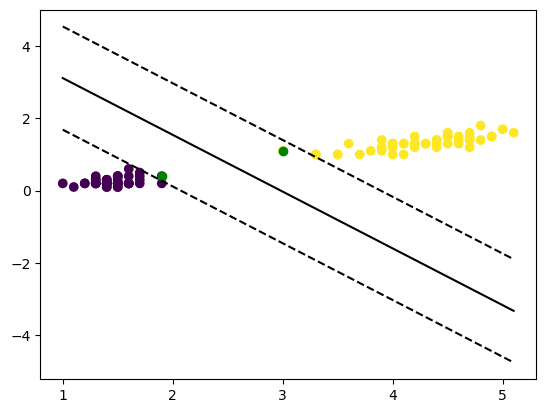

In [112]:
import matplotlib.pyplot as plt
df=pd.read_csv('iris.csv')
df=df.iloc[:100]
feature=df[df.columns[2:4]]
target=df[df.columns[-1]]
target.replace({"Setosa":0, "Versicolor":1}, inplace=True) # setosa VS versicolor+virginica

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(feature[feature.columns[0]].min(),feature[feature.columns[0]].max()) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["petal.length"].values,feature["petal.width"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
#plt.ylim(feature[feature.columns[1]].min()-0.5,feature[feature.columns[1]].max()+0.3)
plt.show()